In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
sns.set_context("notebook")

In [2]:
df = pd.concat([
    pd.read_json("results/1b.jsonl", lines=True).assign(model="1b"),
    pd.read_json("results/2.8b.jsonl", lines=True).assign(model="2.8b"),
]).reset_index()

d = (df
    .groupby(["model", "prompt_template", "open_book"])
        [["match"]]
        .mean()
    .reset_index()
    .pivot(index=["model", "prompt_template"], columns=["open_book"], values="match")
    .rename(columns={False: "closed_book", True: "open_book"})
    .reset_index())

(d.pivot(index=["prompt_template"], columns=["model"], values=["open_book", "closed_book"])
 .sort_values(("open_book", "2.8b"), ascending=False)
 .style
 .format("{:.2f}")
 .format_index("{!r}")
)

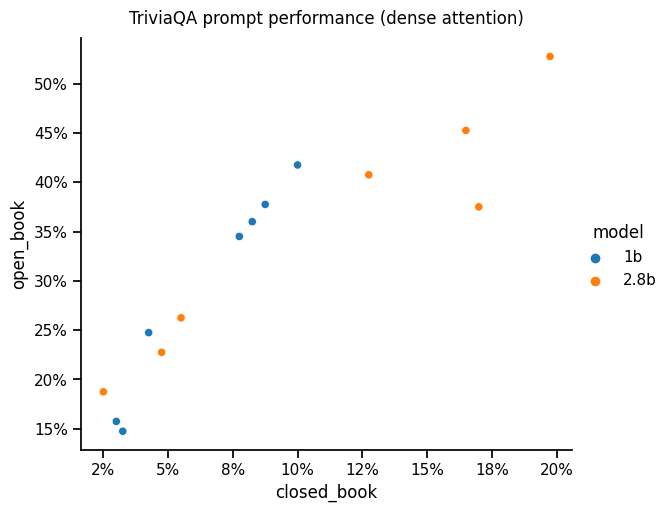

In [6]:
g = sns.relplot(data=d, x="closed_book", y="open_book", hue="model", height=5, aspect=1.2)
for ax in [g.ax.xaxis, g.ax.yaxis]:
    ax.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0%}"))
g.ax.set_title("TriviaQA prompt performance (dense attention)", pad=10);